### Tests de entrenamiento para el conjunto de datos IRIS 

Comenzamos importando todas las librerías y los módulos necesarios para poder entrenar el conjunto de datos IRIS:

In [1]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve
import matplotlib.pyplot as plt

Cargamos los datos de IRIS y preprocesamos los datos. Este dataset tiene solo tres clases (especies de iris), por lo que no necesita una red neuronal compleja:

In [46]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba:

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos una red neuronal simple agregando las siguientes capas:

In [48]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal.

In [49]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test]))
acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.4
epoch   0 - Loss 1.31266, Accuracy 0.75000
epoch  10 - Loss 0.63319, Accuracy 0.95833
epoch  20 - Loss 0.51040, Accuracy 0.91667
epoch  30 - Loss 0.36461, Accuracy 0.91667
epoch  40 - Loss 0.26188, Accuracy 0.95833
epoch  50 - Loss 0.19634, Accuracy 0.95833
epoch  60 - Loss 0.14939, Accuracy 0.95833
epoch  70 - Loss 0.12731, Accuracy 0.95833
epoch  80 - Loss 0.10848, Accuracy 0.95833
epoch  90 - Loss 0.09199, Accuracy 0.95833
epoch 100 - Loss 0.07450, Accuracy 0.95833
epoch 110 - Loss 0.06068, Accuracy 0.95833
epoch 120 - Loss 0.04977, Accuracy 0.95833
epoch 130 - Loss 0.04079, Accuracy 0.95833
epoch 140 - Loss 0.03364, Accuracy 0.95833
epoch 150 - Loss 0.02788, Accuracy 0.95833
epoch 160 - Loss 0.02324, Accuracy 0.95833
epoch 170 - Loss 0.01961, Accuracy 0.95833
epoch 180 - Loss 0.01670, Accuracy 0.95833
epoch 190 - Loss 0.01431, Accuracy 0.95833
epoch 200 - Loss 0.01237, Accuracy 0.91667
epoch 210 - Loss 0.01074, Accuracy 0.91667
epoch 220 - Loss 0.0094

El accuracy después del entrenamiento es el siguiente:

In [50]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  1.0


Obtener un 100% de precisión se puede deber a que el dataset de iris es pequeño y esta bien estructurado, con lo cual modelos simples como este pueden alcanzar una alta precisión sin dificultad.

A continuación, podemos visualizar la matriz de confusión tras calcular la precisión:

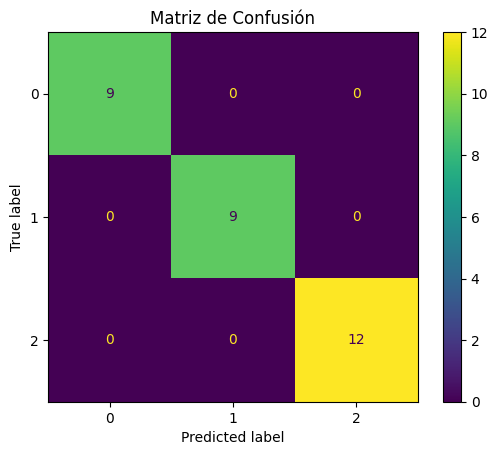

In [51]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

La matriz de confusión revela un desempeño casi excepcional del modelo. Todas las instancias han sido clasificadas correctamente en sus respectivas clases.

A continuación, diseñaremos un modelo de red neuronal más complejo para comprobar si obtiene o no la misma precisión. Al incrementar el número de capas y neuronas en comparación con nuestro primer modelo, buscamos observar si ayuda al modelo a alcanzar una gran precisión o si existe el riesgo de sobreajuste en un dataset relativamente pequeño como el Iris. La nueva red neuronal está compuesta por las siguientes capas: 

In [52]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(4, 20, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(20, 10, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(10, 6, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [53]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.5333333333333333
epoch   0 - Loss 1.66590, Accuracy 0.75000
epoch  10 - Loss 1.87677, Accuracy 0.95833
epoch  20 - Loss 1.90250, Accuracy 0.95833
epoch  30 - Loss 1.94549, Accuracy 0.95833
epoch  40 - Loss 1.92745, Accuracy 0.95833
epoch  50 - Loss 1.81962, Accuracy 0.95833
epoch  60 - Loss 1.71821, Accuracy 0.95833
epoch  70 - Loss 1.63085, Accuracy 0.95833
epoch  80 - Loss 1.55054, Accuracy 0.95833
epoch  90 - Loss 1.47850, Accuracy 0.95833
epoch 100 - Loss 1.41303, Accuracy 0.95833
epoch 110 - Loss 1.35349, Accuracy 0.95833
epoch 120 - Loss 1.29972, Accuracy 0.95833
epoch 130 - Loss 1.24886, Accuracy 0.91667
epoch 140 - Loss 1.16549, Accuracy 0.95833
epoch 150 - Loss 1.08682, Accuracy 0.95833
epoch 160 - Loss 1.01434, Accuracy 0.95833
epoch 170 - Loss 0.94767, Accuracy 0.95833
epoch 180 - Loss 0.88645, Accuracy 0.95833
epoch 190 - Loss 0.83029, Accuracy 0.95833
epoch 200 - Loss 0.77882, Accuracy 0.91667
epoch 210 - Loss 0.73165, Accuracy 0.91667
epoch 22

In [54]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9666666666666667


Los resultados obtenidos muestran que el modelo nn2 alcanzó una precisión del 97% en el conjunto de prueba, lo cual representa una ligera disminución en comparación con el modelo más simple que alcanzó un 100% de precisión. Esta reducción en precisión podría deberse a un leve sobreajuste, ya que el conjunto de datos Iris, al ser pequeño y altamente separable, no necesariamente requiere una red tan profunda y parametrizada.

A continuación, dibujaremos la matriz de confusión para ver donde el modelo no clasificó correctamente las instancias:

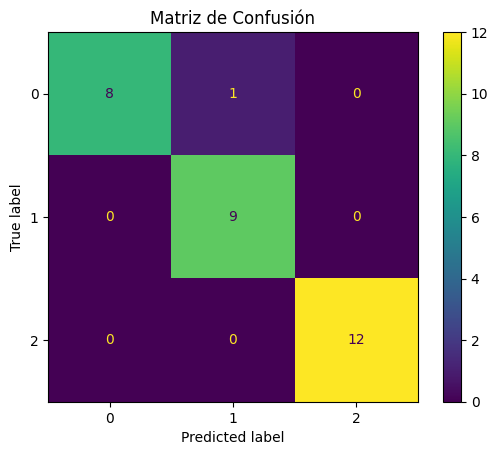

In [55]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

La matriz de confusión del segundo modelo muestra un rendimiento notable. Se han clasificado correctamente todas las instancias de la clase 1 (9) y clase 2(12). Sin embargo, el modelo confunde una instancia de la clase 0 con la clase 1.

Para evaluar la influencia de un modelo complejo de red neuronal en la precisión sobre el conjunto de datos IRIS, hemos querido diseñar un tercer modelo, para comprobar si una red neuronal de tamaño complejo puede ofrecer una precisión alta sin riesgo de sobreajuste.

In [56]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(4, 10, activation_func=relu, activation_derivate=relu_derivate))
nn3.add_layer(Layer(10, 8, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(8, 5, activation_func=relu, activation_derivate=relu_derivate))
nn3.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))


In [57]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test]))
acc3, loss3 = optimizers.gradient_descent(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.26666666666666666
epoch   0 - Loss 3.16129, Accuracy 0.95833
epoch  10 - Loss 0.08387, Accuracy 0.91667
epoch  20 - Loss 0.01174, Accuracy 0.91667
epoch  30 - Loss 0.00923, Accuracy 0.91667
epoch  40 - Loss 0.00659, Accuracy 0.91667
epoch  50 - Loss 0.00511, Accuracy 0.91667
epoch  60 - Loss 0.00392, Accuracy 0.91667
epoch  70 - Loss 0.00307, Accuracy 0.91667
epoch  80 - Loss 0.00241, Accuracy 0.91667
epoch  90 - Loss 0.00194, Accuracy 0.91667
epoch 100 - Loss 0.00155, Accuracy 0.91667
epoch 110 - Loss 0.00127, Accuracy 0.91667
epoch 120 - Loss 0.00107, Accuracy 0.91667
epoch 130 - Loss 0.00092, Accuracy 0.91667
epoch 140 - Loss 0.00079, Accuracy 0.91667
epoch 150 - Loss 0.00069, Accuracy 0.91667
epoch 160 - Loss 0.00061, Accuracy 0.91667
epoch 170 - Loss 0.00053, Accuracy 0.91667
epoch 180 - Loss 0.00047, Accuracy 0.91667
epoch 190 - Loss 0.00042, Accuracy 0.91667
epoch 200 - Loss 0.00038, Accuracy 0.91667
epoch 210 - Loss 0.00035, Accuracy 0.91667
epoch 2

In [58]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test): ", acc_model3)

Accuracy after training (on test):  0.9333333333333333


Este modelo alcanzó una precisión con una ligera disminución en comparación con los dos modelos anteriores. Este resultado refuerza nuestra hipótesis inicial de que, para el conjunto de datos Iris, una arquitectura simple es suficiente para capturar las relaciones entre las clases de manera efectiva. La reducción en la precisión sugiere que añadir mayor profundidad y complejidad, no necesariamente aporta beneficios significativos en la clasificación de este dataset.

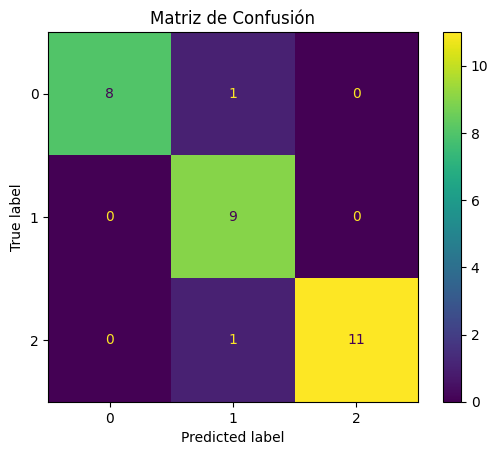

In [59]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Podemos ver que este modelo clasifica correctamente la clase 1, sin embargo, confunde la clase 0 con la 1, y la clase 2 con la 1

Para finalizar con este test, graficaremos la precisión y la pérdida a lo largo de las épocas:

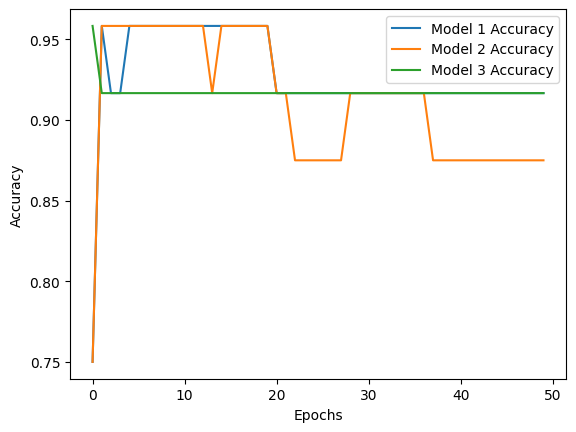

In [60]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.plot(acc3, label="Model 3 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

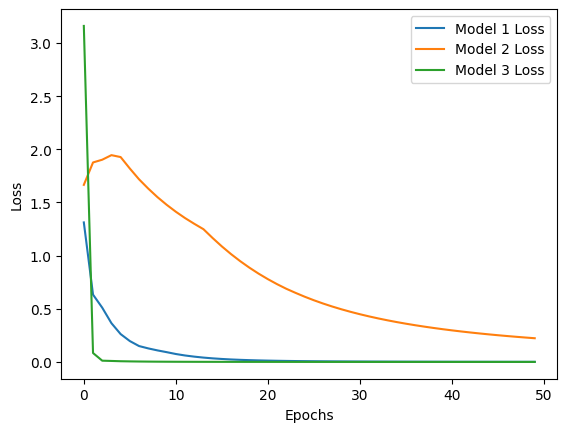

In [61]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.plot(loss3, label="Model 3 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Test de entrenamiento del conjunto de datos DIGITS

Empezamos importando todas las librerías y los módulos necesarios para poder entrenar el segundo conjunto de datos, en este caso DIGITS:

In [2]:
from data.load_data import load_digits_data
from Neural_Network.layer import Layer
from Neural_Network.neural_network import NeuralNetwork
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

Cargamos y preprocesamos los datos del conjunto de datos DIGITS. El conjunto de datos DIGITS, consta de imágenes de 8x8 píxeles en escala de grises, lo que significa que cada imagen tiene 64 características de entrada.

In [68]:
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos un primer modelo de red neuronal que tiene como objetivo clasificar y entrenar las imágenes utilizando un modelo relativamente compacto.

In [70]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [71]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.1638888888888889
epoch   0 - Loss 0.74864, Accuracy 0.43750
epoch  10 - Loss 0.17023, Accuracy 0.73958
epoch  20 - Loss 0.24611, Accuracy 0.77431
epoch  30 - Loss 0.24750, Accuracy 0.80903
epoch  40 - Loss 0.20016, Accuracy 0.82639
epoch  50 - Loss 0.08218, Accuracy 0.81944
epoch  60 - Loss 0.06529, Accuracy 0.81944
epoch  70 - Loss 0.03391, Accuracy 0.81944
epoch  80 - Loss 0.03688, Accuracy 0.81944
epoch  90 - Loss 0.03871, Accuracy 0.82639
epoch 100 - Loss 0.03676, Accuracy 0.84028
epoch 110 - Loss 0.03178, Accuracy 0.83333
epoch 120 - Loss 0.03098, Accuracy 0.84375
epoch 130 - Loss 0.04007, Accuracy 0.83681
epoch 140 - Loss 0.04188, Accuracy 0.83681
epoch 150 - Loss 0.03989, Accuracy 0.83333
epoch 160 - Loss 0.04301, Accuracy 0.84028
epoch 170 - Loss 0.04846, Accuracy 0.83681
epoch 180 - Loss 0.05337, Accuracy 0.83681
epoch 190 - Loss 0.05400, Accuracy 0.83333
epoch 200 - Loss 0.05288, Accuracy 0.83333
epoch 210 - Loss 0.05351, Accuracy 0.83681
epoch 22

El accuracy final después de entrenar es el siguiente:

In [72]:
Y_pred1 = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred1)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.8333333333333334


El modelo alcanzó una precisión eficiente, pero no logra capturar completamente la complejidad del conjunto de datos. En conclusión, para mejorar la precisión en la clasificación de dígitos, una arquitectura ligeramente más compleja podría ser más adecuada.

Ahora visualizaremos en una matriz de confusión el rendimiento del modelo:

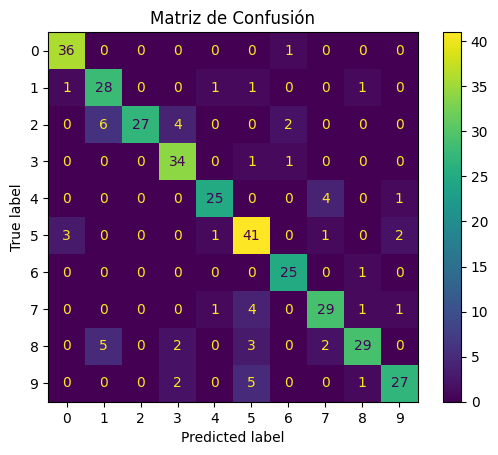

In [22]:
y_pred_classes = np.argmax(Y_pred1, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos observar, con este dataset el modelo contiene una alta precisión clasificando las clases, aunque podría ser mejor, y para ello realizaremos más modelos.

Para mejorar el rendimiento en la clasificación, hemos optado por una arquitectura de red neuronal más profunda, nn2, que cuenta con varias capas y un mayor número de neuronas en cada una de ellas.

In [73]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [74]:
accuracy_before_nn2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training (Model 2): ", accuracy_before_nn2)

acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)


Accuracy before training (Model 2):  0.09722222222222222
epoch   0 - Loss 1.96592, Accuracy 0.29167
epoch  10 - Loss 0.26117, Accuracy 0.73264
epoch  20 - Loss 0.13322, Accuracy 0.83333
epoch  30 - Loss 0.07768, Accuracy 0.88194
epoch  40 - Loss 0.05845, Accuracy 0.89583
epoch  50 - Loss 0.04907, Accuracy 0.90278
epoch  60 - Loss 0.04080, Accuracy 0.89931
epoch  70 - Loss 0.03347, Accuracy 0.90278
epoch  80 - Loss 0.02768, Accuracy 0.90972
epoch  90 - Loss 0.02360, Accuracy 0.90972
epoch 100 - Loss 0.02118, Accuracy 0.90625
epoch 110 - Loss 0.02037, Accuracy 0.91319
epoch 120 - Loss 0.01703, Accuracy 0.91319
epoch 130 - Loss 0.01438, Accuracy 0.92014
epoch 140 - Loss 0.01248, Accuracy 0.92014
epoch 150 - Loss 0.01095, Accuracy 0.92014
epoch 160 - Loss 0.00968, Accuracy 0.92014
epoch 170 - Loss 0.00863, Accuracy 0.92361
epoch 180 - Loss 0.00775, Accuracy 0.92361
epoch 190 - Loss 0.00700, Accuracy 0.92361
epoch 200 - Loss 0.00637, Accuracy 0.92361
epoch 210 - Loss 0.00583, Accuracy 0.923

In [75]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test - Model 2): ", acc_model2)


Accuracy after training (on test - Model 2):  0.9111111111111111


El modelo nn2, con su arquitectura más profunda y compuesta por múltiples capas ocultas, logró una precisión superando notablemente el rendimiento del modelo anterior. Este aumento en la precisión indica que la red ha sido capaz de aprender patrones más complejos y diferenciadores en las imágenes de dígitos manuscritos. Sin embargo, aunque se ha observado una mejora, todavía hay margen para optimizar el rendimiento del modelo.

Visualización de la matriz de confusión para este segundo modelo:

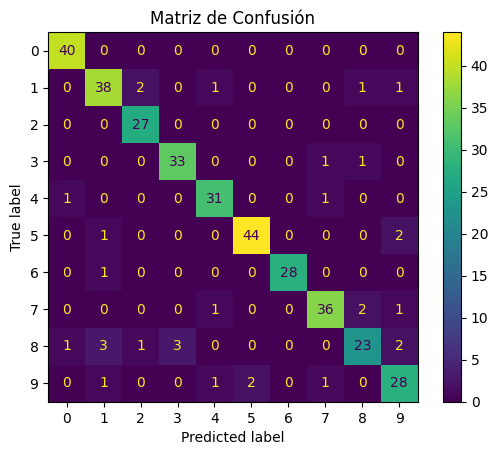

In [76]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero.

Diseñaremos un modelo nn3 que busque mejorar aún más la precisión en la clasificación del conjunto de datos DIGITS.

Este modleo presenta una arquitectura que combina un mayor número de capas y neuronas, junto con quizás una elección de funciones de activación que pueden proporcionar mejor rendimiento.

In [84]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(64, 64, activation_func=relu, activation_derivate=relu_derivate))  
nn3.add_layer(Layer(64, 32, activation_func=relu, activation_derivate=relu_derivate))  
nn3.add_layer(Layer(32, 16, activation_func=tanh, activation_derivate=tanh_derivate))  
nn3.add_layer(Layer(16, 10, activation_func=softmax, activation_derivate=softmax_derivate))  

In [85]:
accuracy_before_nn3 = NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test])
print("Accuracy before training (Model 2): ", accuracy_before_nn2)

acc3, loss3 = optimizers.gradient_descent(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)


Accuracy before training (Model 2):  0.09722222222222222
epoch   0 - Loss 1.77331, Accuracy 0.20139
epoch  10 - Loss 1.07894, Accuracy 0.39931
epoch  20 - Loss 1.14478, Accuracy 0.45833
epoch  30 - Loss 2.01147, Accuracy 0.45833
epoch  40 - Loss 0.12016, Accuracy 0.49306
epoch  50 - Loss 1.86814, Accuracy 0.27431
epoch  60 - Loss 0.99603, Accuracy 0.36111
epoch  70 - Loss 3.10820, Accuracy 0.51389
epoch  80 - Loss 3.71462, Accuracy 0.44444
epoch  90 - Loss 4.11342, Accuracy 0.39931
epoch 100 - Loss 0.31204, Accuracy 0.44444
epoch 110 - Loss 0.61743, Accuracy 0.44097
epoch 120 - Loss 0.65806, Accuracy 0.44097
epoch 130 - Loss 0.64162, Accuracy 0.44097
epoch 140 - Loss 0.62618, Accuracy 0.44097
epoch 150 - Loss 0.61640, Accuracy 0.44097
epoch 160 - Loss 0.61011, Accuracy 0.44097
epoch 170 - Loss 0.60588, Accuracy 0.44097
epoch 180 - Loss 0.60294, Accuracy 0.44097
epoch 190 - Loss 0.60084, Accuracy 0.44097
epoch 200 - Loss 0.59932, Accuracy 0.44097
epoch 210 - Loss 0.59819, Accuracy 0.440

In [86]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test - Model 3): ", acc_model3)


Accuracy after training (on test - Model 3):  0.38055555555555554


In [ ]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Esta precisión nos indica que a pesar de la mayor complejidad de la arquitectura, el modelo no ha logrado capturar de manera efectiva las características relevantes de los datos para realizar una clasificación precisa.

La baja precisión podría deberse a varios factores: 

1. El modelo podría haber sobreajustado a los datos de entrenamiento.
2. Las elecciones de funciones de activación pueden no ser las más adecuadas para todas las capas.
3. Aumentar el número de neuronas en las capas no siempre garantiza un mejor rendimiento.

Para finalizar con este segundo test, imprimiremos la curva de roc para cada uno de los modelos estudiados:

In [87]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(10))  
n_classes = y_test_bin.shape[1]

In [3]:
def plot_roc_curve(y_score, y_test_bin, model_number):
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  
        roc_auc = auc(fpr, tpr)  
        plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Model {model_number}')
    plt.legend(loc="lower right")
    plt.show()

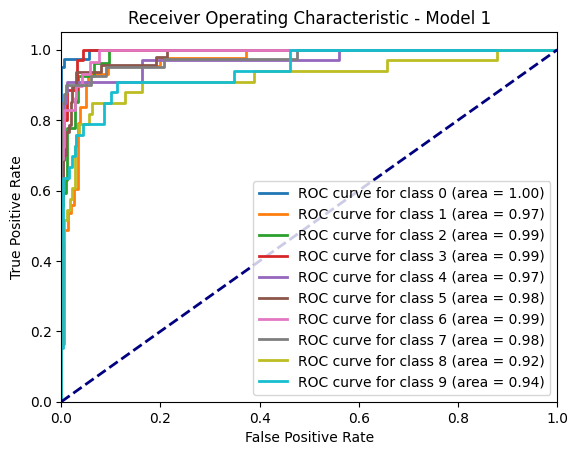

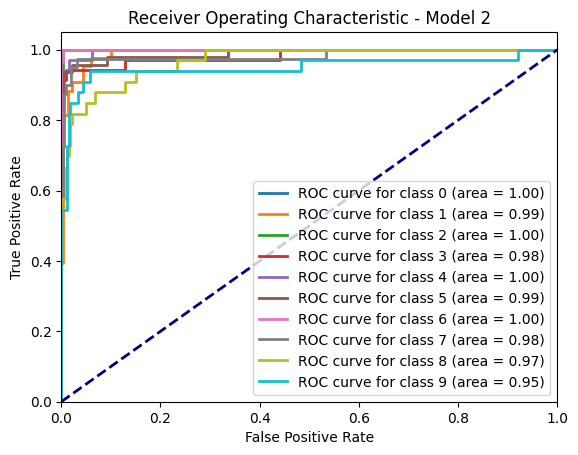

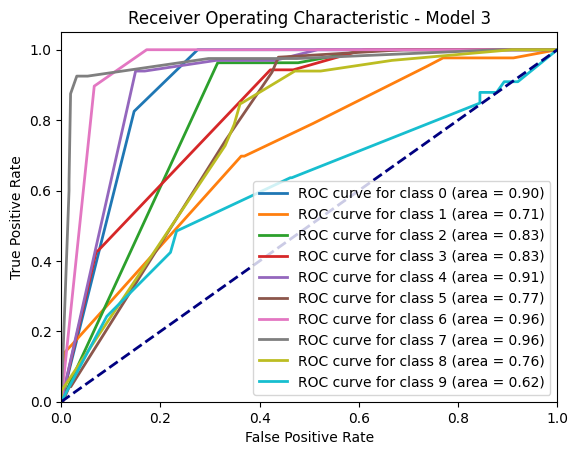

In [90]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  
plot_roc_curve(y_score2, y_test_bin, 2)

y_score3 = np.array([nn3.feedforward(x) for x in X_test])  
plot_roc_curve(y_score3, y_test_bin, 3)

### Tests de entrenamiento para el conjunto de datos WINE 

Importamos el método para extraer los datos del conjunto de datos WINE.

In [4]:
from data.load_data import load_wine_data

El objetivo de este test es desarrollar y evaluar modelos que puedan clasificar las diferentes variedades de vino en función de sus propiedades químicas. Cargamos los datos del dataset y los preprocesamos.

In [5]:
X, y = load_wine_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Ahora dividimos el conjunto de datos en train y test para poder entrenarlos:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

A continuación, definimos el modelo de red neuronal, nn, donde se emplean funciones de activación ReLu en las capas ocultas, mientras que la función de activación softmax se utiliza en la capa de salida para calcular las probabilidades de pertenencia a cada clase.

In [7]:
nn = NeuralNetwork()
nn.add_layer(Layer(13, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 4, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(4, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Entrenamos el modelo:

In [8]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.08333333333333333
epoch   0 - Loss 1.50130, Accuracy 0.75862
epoch  10 - Loss 0.09894, Accuracy 0.82759
epoch  20 - Loss 0.06149, Accuracy 0.89655
epoch  30 - Loss 0.04591, Accuracy 0.89655
epoch  40 - Loss 0.03647, Accuracy 0.93103
epoch  50 - Loss 0.02991, Accuracy 0.93103
epoch  60 - Loss 0.02498, Accuracy 0.93103
epoch  70 - Loss 0.01871, Accuracy 0.93103
epoch  80 - Loss 0.01452, Accuracy 0.93103
epoch  90 - Loss 0.01155, Accuracy 0.93103
epoch 100 - Loss 0.00977, Accuracy 0.93103
epoch 110 - Loss 0.00817, Accuracy 0.96552
epoch 120 - Loss 0.00709, Accuracy 0.96552
epoch 130 - Loss 0.00637, Accuracy 0.96552
epoch 140 - Loss 0.00548, Accuracy 0.96552
epoch 150 - Loss 0.00482, Accuracy 0.96552
epoch 160 - Loss 0.00430, Accuracy 0.96552
epoch 170 - Loss 0.00390, Accuracy 0.96552
epoch 180 - Loss 0.00357, Accuracy 0.96552
epoch 190 - Loss 0.00331, Accuracy 0.96552
epoch 200 - Loss 0.00310, Accuracy 0.96552
epoch 210 - Loss 0.00293, Accuracy 0.96552
epoch 2

El accuracy después de entrenar este primer modelo es el siguiente:

In [9]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.8888888888888888


El modelo nn ha alcanzado una precisión sólida en la clasificación del conjunto de datos Wine, lo que indica un rendimiento preciso en la identificación de las diferentes variedades de vino. Esta precisión sugiere que la arquitectura de la red y la elección de las funciones de activación han sido adecuadas para el problema en cuestión. Sin embargo, hay oportunidades para mejorar aún más el modelo mediante la experimentación con diferentes configuraciones, como el añadir más capas o neuronas, o la implementación de técnicas de regularización para evitar el sobreajuste.

Ahora para una mejor visualización de nuestras conclusiones, dibujaremos la matriz de confusión de este primer modelo:

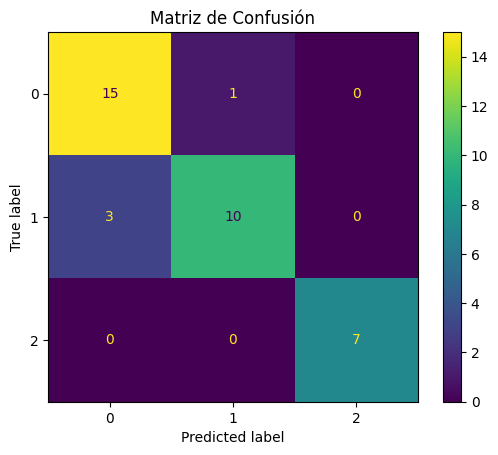

In [10]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos ver, ha funcionado bastante bien, pero el resultado podría ser mejor, por lo que vamos a probar con un segundo modelo.

El modelo de red neuronal nn2 presenta una arquitectura más compleja en comparación con el modelo anterior nn. Esta red consta de cinco capas. Todas las capas ocultas utilizan la función de activación sigmoid. La capa de salida utiliza la función softmax para obtener probabilidades de clasificación. La mayor complejidad del modelo busca capturar patrones más complicados de los datos, lo que podría resultar en una mejor clasificación de los vinos.

In [11]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(13, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(10, 4, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(4, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [12]:
accuracy_before2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before2)
acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.19444444444444445
epoch   0 - Loss 1.01370, Accuracy 0.37931
epoch  10 - Loss 0.84737, Accuracy 0.37931
epoch  20 - Loss 0.80514, Accuracy 0.37931
epoch  30 - Loss 0.68424, Accuracy 0.65517
epoch  40 - Loss 0.56988, Accuracy 0.65517
epoch  50 - Loss 0.49716, Accuracy 0.65517
epoch  60 - Loss 0.42663, Accuracy 0.68966
epoch  70 - Loss 0.33210, Accuracy 0.82759
epoch  80 - Loss 0.22667, Accuracy 0.86207
epoch  90 - Loss 0.14420, Accuracy 0.89655
epoch 100 - Loss 0.09565, Accuracy 0.93103
epoch 110 - Loss 0.06783, Accuracy 0.96552
epoch 120 - Loss 0.05105, Accuracy 0.96552
epoch 130 - Loss 0.04025, Accuracy 0.96552
epoch 140 - Loss 0.03288, Accuracy 0.96552
epoch 150 - Loss 0.02762, Accuracy 0.96552
epoch 160 - Loss 0.02372, Accuracy 0.96552
epoch 170 - Loss 0.02072, Accuracy 0.96552
epoch 180 - Loss 0.01836, Accuracy 0.96552
epoch 190 - Loss 0.01646, Accuracy 0.96552
epoch 200 - Loss 0.01490, Accuracy 0.96552
epoch 210 - Loss 0.01360, Accuracy 0.96552
epoch 2

In [13]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9444444444444444


El modelo nn2 ha logrado una impresionante precisión del 100% en la clasificación del conjunto de datos Wine, superando notablemente el rendimiento del modelo anterior nn. Este resultado sugiere que la combinación de una mayor complejidad en la arquitectura de la red y el uso de la función de activación sigmoid en las capas ocultas ha permitido al modelo aprender de manera efectiva las relaciones entre las características químicas de los vinos y sus respectivas clases.

Asimismo, presentaremos gráficamente estos resultados:

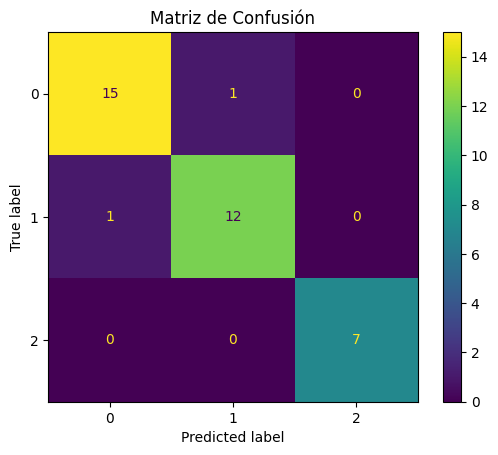

In [14]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Otra manera de comparar los modelos es graficando la precisión y la pérdida a lo largo de las épocas:

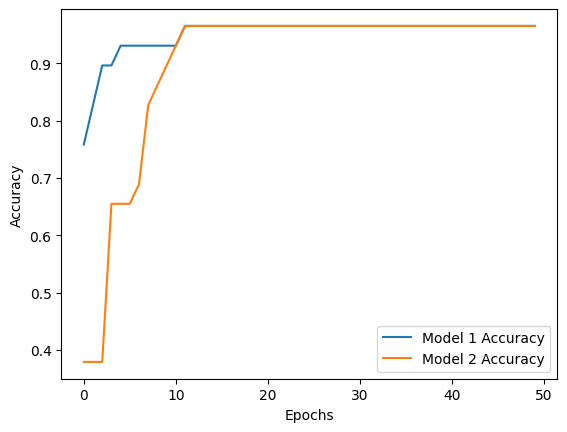

In [15]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

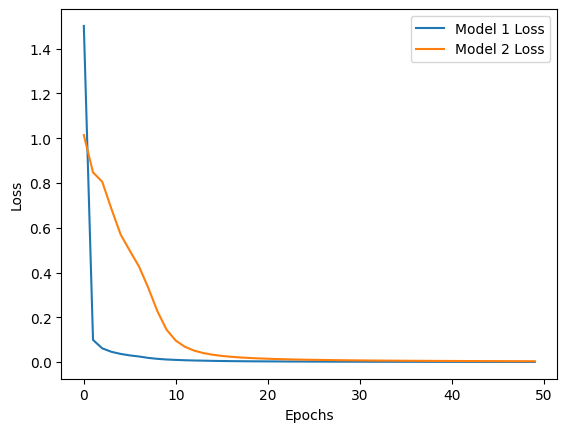

In [16]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Y para terminar con este dataset, imprimiremos la curva de roc para estos dos modelos:

In [17]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(3))  
n_classes = y_test_bin.shape[1]

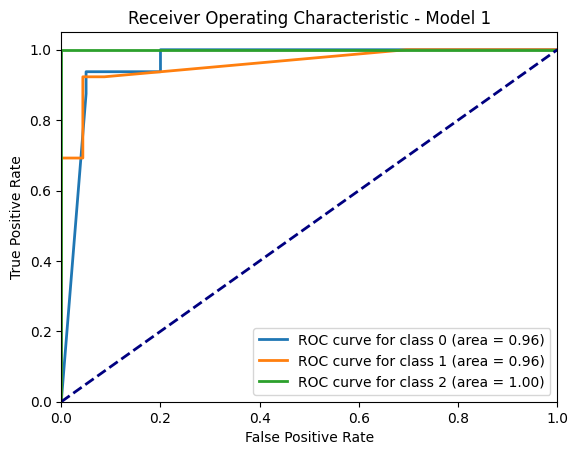

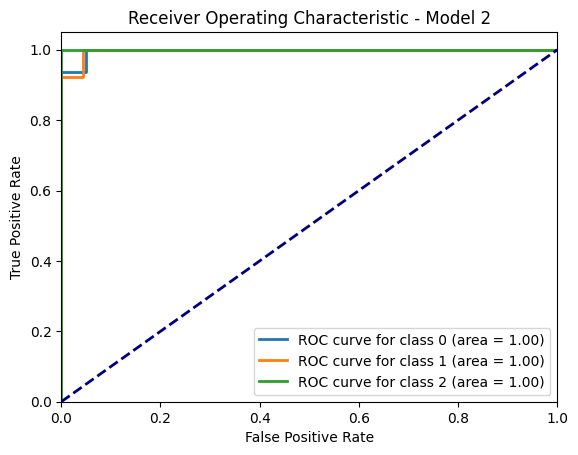

In [18]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score2, y_test_bin, 2)

Para realizar más pruebas con el conjunto de datos, vamor a probar a usar el método de optimización Adam, en vez de usar el descenso por el gradiente, y para la función de activación haremos uso de la tangente hiperbólica.

In [19]:
nn3 = NeuralNetwork()
nn3.add_layer(Layer(13, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(5, 10, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(10, 4, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(4, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn3.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [20]:
accuracy_before3 = NeuralNetwork.accuracy(y_test, [nn3.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before3)
acc3, loss3 = optimizers.momentum_optimizer(nn3, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.3611111111111111
epoch   0 - Loss 0.10415, Accuracy 0.89655
epoch  10 - Loss 0.00332, Accuracy 1.00000
epoch  20 - Loss 0.00210, Accuracy 0.93103
epoch  30 - Loss 0.00106, Accuracy 0.93103
epoch  40 - Loss 0.00069, Accuracy 0.93103
epoch  50 - Loss 0.00051, Accuracy 0.93103
epoch  60 - Loss 0.00040, Accuracy 0.93103
epoch  70 - Loss 0.00033, Accuracy 0.93103
epoch  80 - Loss 0.00028, Accuracy 0.93103
epoch  90 - Loss 0.00025, Accuracy 0.93103
epoch 100 - Loss 0.00022, Accuracy 0.93103
epoch 110 - Loss 0.00020, Accuracy 0.93103
epoch 120 - Loss 0.00018, Accuracy 0.93103
epoch 130 - Loss 0.00017, Accuracy 0.93103
epoch 140 - Loss 0.00015, Accuracy 0.93103
epoch 150 - Loss 0.00014, Accuracy 0.93103
epoch 160 - Loss 0.00013, Accuracy 0.93103
epoch 170 - Loss 0.00013, Accuracy 0.93103
epoch 180 - Loss 0.00012, Accuracy 0.93103
epoch 190 - Loss 0.00011, Accuracy 0.93103
epoch 200 - Loss 0.00011, Accuracy 0.93103
epoch 210 - Loss 0.00010, Accuracy 0.93103
epoch 22

In [21]:
Y_pred3 = [nn3.feedforward(x) for x in X_test]
acc_model3 = NeuralNetwork.accuracy(y_test, Y_pred3)
print("Accuracy after training (on test): ", acc_model3)

Accuracy after training (on test):  0.9166666666666666


Este tercer modelo de red neuronal presenta una arquitectura más compleja en comparación con el modelo anterior nn. Esta red consta de cinco capas. Todas las capas ocultas utilizan la función de activación tanh. La capa de salida utiliza la función softmax para obtener probabilidades de clasificación. La mayor diferencia es el uso del optimizador del descenso del gradiente con momentum, obteniendo un buen resultado.

Ahora para terminar, presentaremos gráficamente estos resultados:

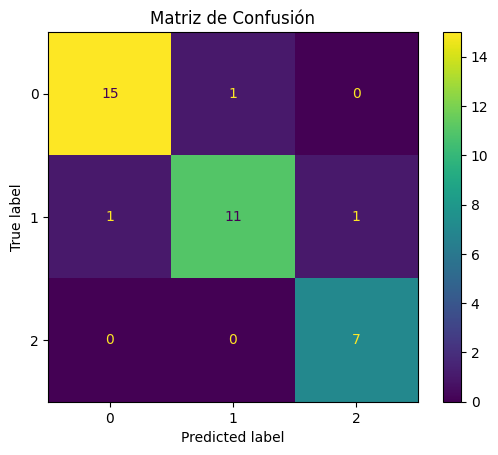

In [22]:
y_pred_classes = np.argmax(Y_pred3, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

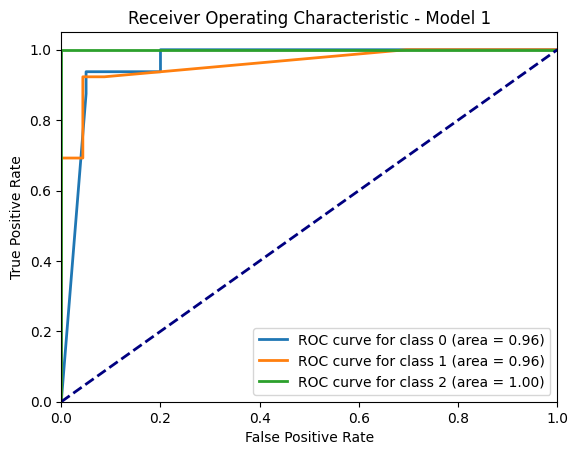

In [23]:
y_score3 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score3, y_test_bin, 1)